# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to u9nderstand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
 okiloGGGGGGGGGGGG  aabsn3
Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### Business Goal
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



## Data understanding, preparation and EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
bike = pd.read_csv("day.csv")

In [3]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data understanding

In [4]:
# Check the descriptive information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Check the shape of df
print(bike.shape)

(730, 16)


### Findings :
Dataset has 730 rows and 16 columns.

Except one column, all other are either float or integer type.

One column is date type.

Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

We will analyse and finalize whether to convert them to categorical or treat as integer.

### Data Quality Check

#### Check for NULL/MISSING values


In [7]:
# percentage of missing values in each column
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [8]:
# row-wise null count percentage
round((bike.isnull().sum(axis=1)/len(bike))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

#### Conclusion
There are no missing / Null values either in columns or rows


#### Duplicate Check


In [9]:
bike_copy = bike.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_copy.drop_duplicates(subset=None, inplace=True)

In [10]:
bike_copy.shape


(730, 16)

In [11]:
bike.shape

(730, 16)

In [12]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### Conclusion
The shape after running the drop duplicate command is same as the original dataframe.

Hence we can conclude that there were zero duplicate values in the dataset.

### Data Cleaning

Checking value_counts() for entire dataframe.

This will help to identify any Unknow/Junk values present in the dataset.

In [13]:
#Create a copy of the  dataframe, without the 'instant' column, 

#as this will have unique values, and donot make sense to do a value count on it.

bike_dummy=bike.iloc[:,1:16]

In [14]:
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

dteday
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64 



season
3    188
2    184
1    180
4    178
Name: count, dtype: int64 



yr
0    365
1    365
Name: count, dtype: int64 



mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64 



holiday
0    709
1     21
Name: count, dtype: int64 



weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64 



workingday
1    499
0    231
Name: count, dtype: int64 



weathersit
1    463
2    246
3     21
Name: count, dtype: int64 



temp
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: count, Length: 498, dtype: int64 



atemp
32.7

#### Conclusion
There seems to be no Junk/Unknown values in the entire dataset.

### Removing redundant & unwanted columns

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

instant : Its only an index value

dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.

casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.

We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation

In [15]:
bike.columns


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [16]:
bike=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [17]:
bike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### EDA

Here we'll do the following tasks:

- We would be able to check if all the variables are linearly related or not (important if we want to proceed with a linear model)
- Checking if there are any multicollinearity that exist
- Here's where we can also identify if some predictors directly have a strong association(correlation) with the outcome variable
We'll visualise our data using matplotlib and seaborn.

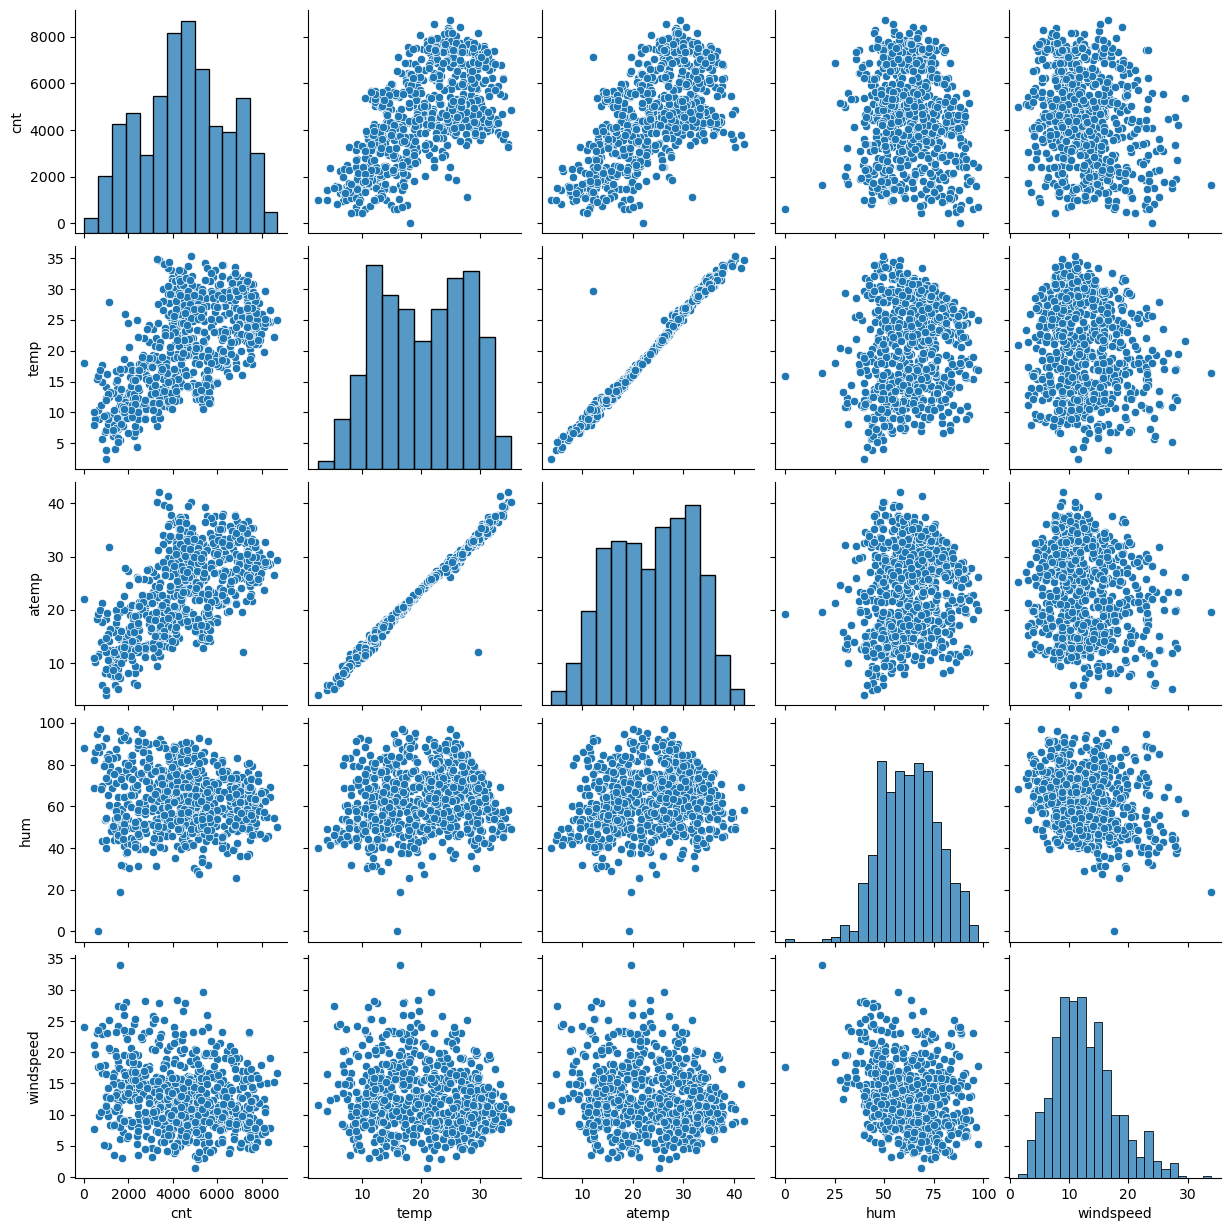

In [18]:
#visualizing
sns.pairplot(data = bike, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### Conclusion : 
By visualising the numeric variables, we can conclude that a linear model can be considered in this case because there are atleast some independent variables like atemp , temp etc. that show a positive correlation with the target variable cnt .

#### Visualising Categorical Variables : Using a Boxplot

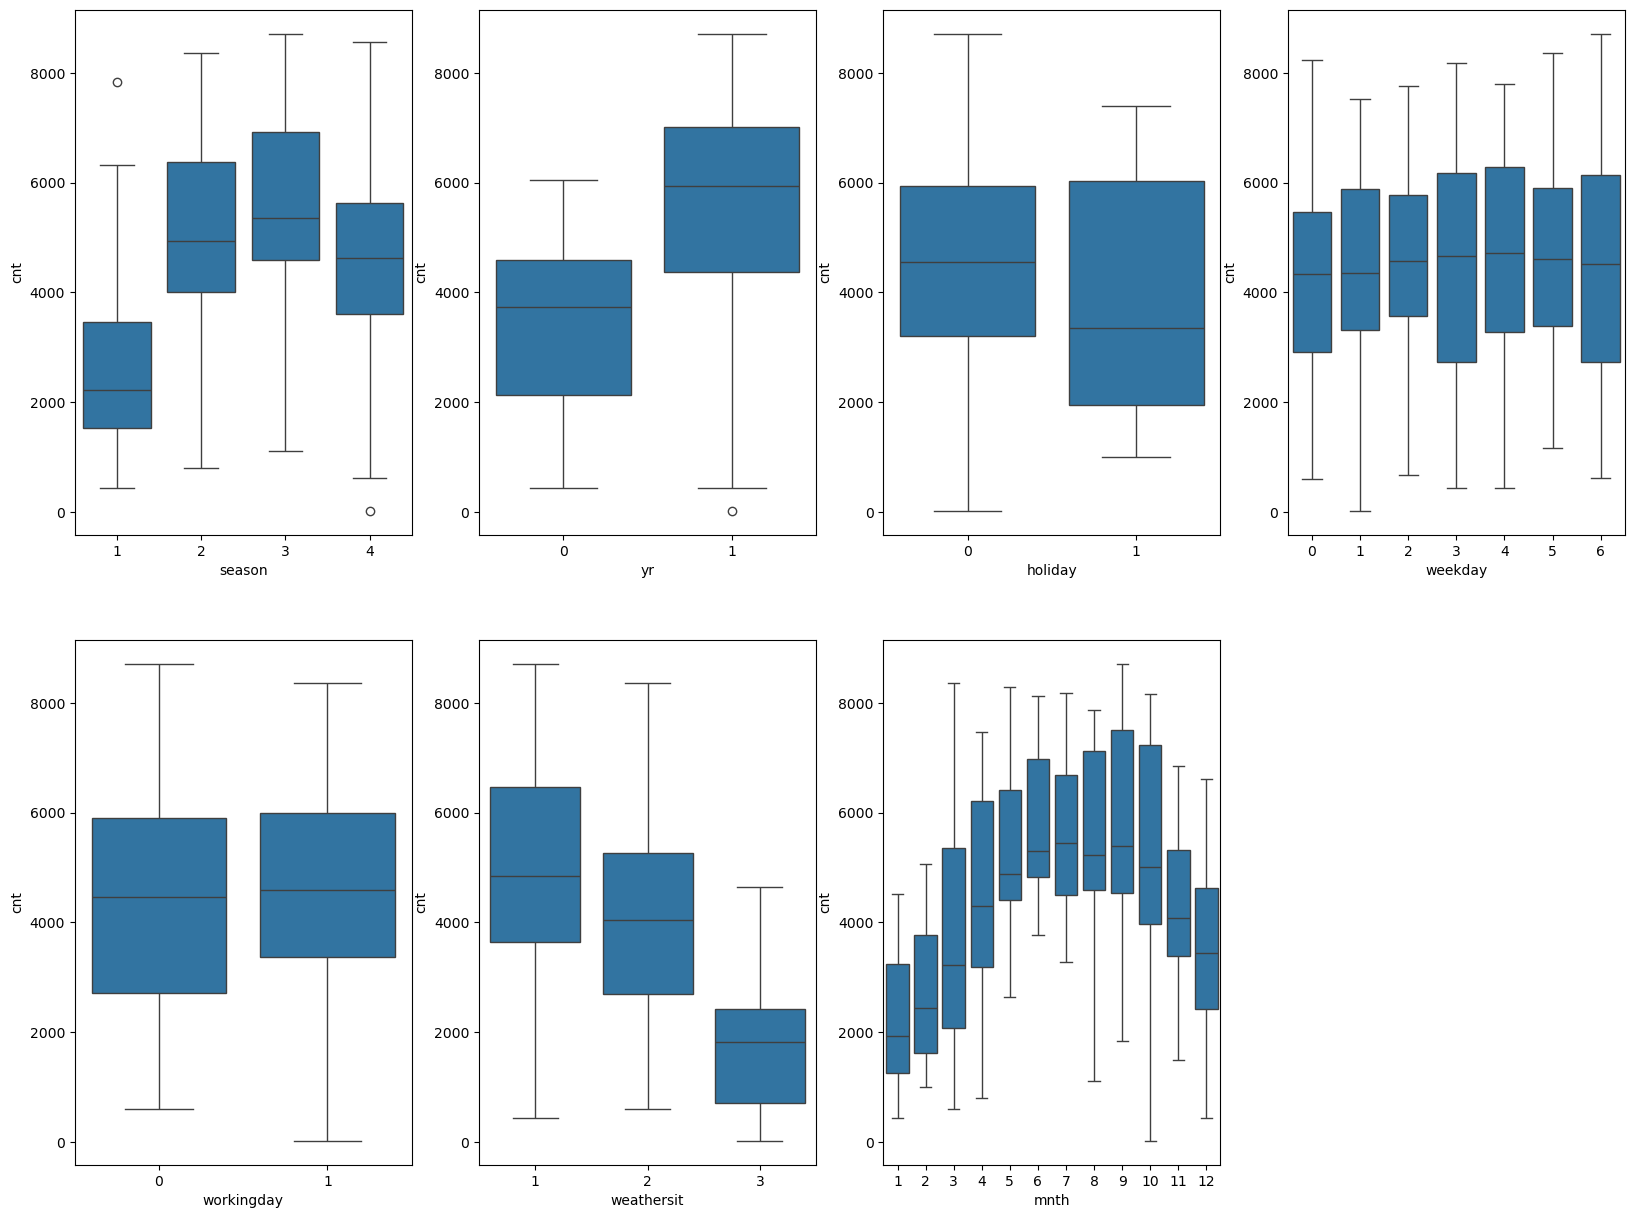

In [19]:
plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.show()

#### Observations

There 7 categorical variables in the dataset.

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) .

The inference that conclusion we could derive were:

- season: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable."
- yr : sales have increased in 2019 compared to 2018 hence indicates it can be correlated with other predictors
- mnth: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.
- weathersit: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.
- holiday: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.
- weekday: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.
- workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

## Data Preparation for modelling

- Converting categorical binary vars to 1s and 0s
- Converting other categorical vars with more than 2 categories to dummy variables

In [20]:
# yes / no variables
varlist = ['yr','holiday','workingday']
bike[varlist].head()
#these are already converted to 0s and 1s

,yr,holiday,workingday
0,0,0,0
1,0,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [21]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variables

In [22]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [23]:
#Converting columns to str type for get_dummies to work correctly
bike['season'] = bike['season'].astype(str)
bike['weekday'] = bike['weekday'].astype(str)
bike['weathersit'] = bike['weathersit'].astype(str)
bike['mnth'] = bike['mnth'].astype(str)

In [24]:
#creating dummy variables for categories for more than 2 values
varlist2 = pd.get_dummies(bike[['season','weekday','weathersit','mnth']], drop_first=True)
varlist2 = varlist2.astype(int)
varlist2

,season_2,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,...,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9
0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
726,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
727,0,0,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
728,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [25]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [26]:
varlist2.columns

Index(['season_2', 'season_3', 'season_4', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2',
       'weathersit_3', 'mnth_10', 'mnth_11', 'mnth_12', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9'],
      dtype='object')

In [27]:
#concat the dummy df with original one bike df
bike = pd.concat([bike, varlist2] , axis = 1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#dropping the original categoriacal columns since we dont need we will use dummies columns
bike= bike.drop(['season','weekday','weathersit','mnth'] , axis = 1)
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2',
       'weathersit_3', 'mnth_10', 'mnth_11', 'mnth_12', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9'],
      dtype='object')

### SPLITTING THE DATA

Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio)
We will use train_test_split method from sklearn package for thisZZZ

In [30]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

#np.random.seed(0)
#df_train, df_test = train_test_split(bike, train_size = 0.70, test_size = 0.30, random_state = 100)

#y to contain only target variable
y=bike.pop('cnt')

#X is all remainign variable also our independent variables
X=bike

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100)

In [31]:
#Verify the info and shape of the dataframes after split:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 653 to 520
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            511 non-null    int64  
 1   holiday       511 non-null    int64  
 2   workingday    511 non-null    int64  
 3   temp          511 non-null    float64
 4   atemp         511 non-null    float64
 5   hum           511 non-null    float64
 6   windspeed     511 non-null    float64
 7   season_2      511 non-null    int32  
 8   season_3      511 non-null    int32  
 9   season_4      511 non-null    int32  
 10  weekday_1     511 non-null    int32  
 11  weekday_2     511 non-null    int32  
 12  weekday_3     511 non-null    int32  
 13  weekday_4     511 non-null    int32  
 14  weekday_5     511 non-null    int32  
 15  weekday_6     511 non-null    int32  
 16  weathersit_2  511 non-null    int32  
 17  weathersit_3  511 non-null    int32  
 18  mnth_10       511 non-null    int

In [32]:
X_train.shape


(511, 29)

In [33]:
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    int32  
 8   season_3      219 non-null    int32  
 9   season_4      219 non-null    int32  
 10  weekday_1     219 non-null    int32  
 11  weekday_2     219 non-null    int32  
 12  weekday_3     219 non-null    int32  
 13  weekday_4     219 non-null    int32  
 14  weekday_5     219 non-null    int32  
 15  weekday_6     219 non-null    int32  
 16  weathersit_2  219 non-null    int32  
 17  weathersit_3  219 non-null    int32  
 18  mnth_10       219 non-null    int3

In [34]:
X_test.shape


(219, 29)

In [35]:
y_test.info

<bound method Series.info of 184    6043
535    6211
299    2659
221    4780
152    4968
       ... 
400    2947
702    6606
127    4333
640    7572
72     2046
Name: cnt, Length: 219, dtype: int64>

### RESCALING THE FEATURES
We will use Min-Max scaling (this will take care of outliers as well)

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9
653,1,0,1,19.201653,23.0423,55.8333,12.208807,0,0,1,...,0,0,0,0,0,0,0,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,0,1,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,0,0,0,...,0,0,0,1,0,0,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [39]:
X_train.columns


Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2',
       'weathersit_3', 'mnth_10', 'mnth_11', 'mnth_12', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9'],
      dtype='object')

In [40]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [41]:
# Checking values after scaling
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,1,0,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [42]:
X_train.describe()
#min values are all 0 and max values are all 1 after scaling

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.513133,0.650333,0.320844,0.246575,0.262231,0.248532,...,0.086106,0.084149,0.066536,0.097847,0.078278,0.084149,0.076321,0.076321,0.095890,0.080235
std,0.500412,0.157613,0.468042,0.225640,0.212202,0.145741,0.169639,0.431440,0.440279,0.432585,...,0.280795,0.277883,0.249461,0.297399,0.268872,0.277883,0.265771,0.265771,0.294729,0.271923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## BUILDING A LINEAR MODEL

### Training the model


In [43]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2',
       'weathersit_3', 'mnth_10', 'mnth_11', 'mnth_12', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9'],
      dtype='object')

In [44]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2',
       'weathersit_3', 'mnth_10', 'mnth_11', 'mnth_12', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9'],
      dtype='object')

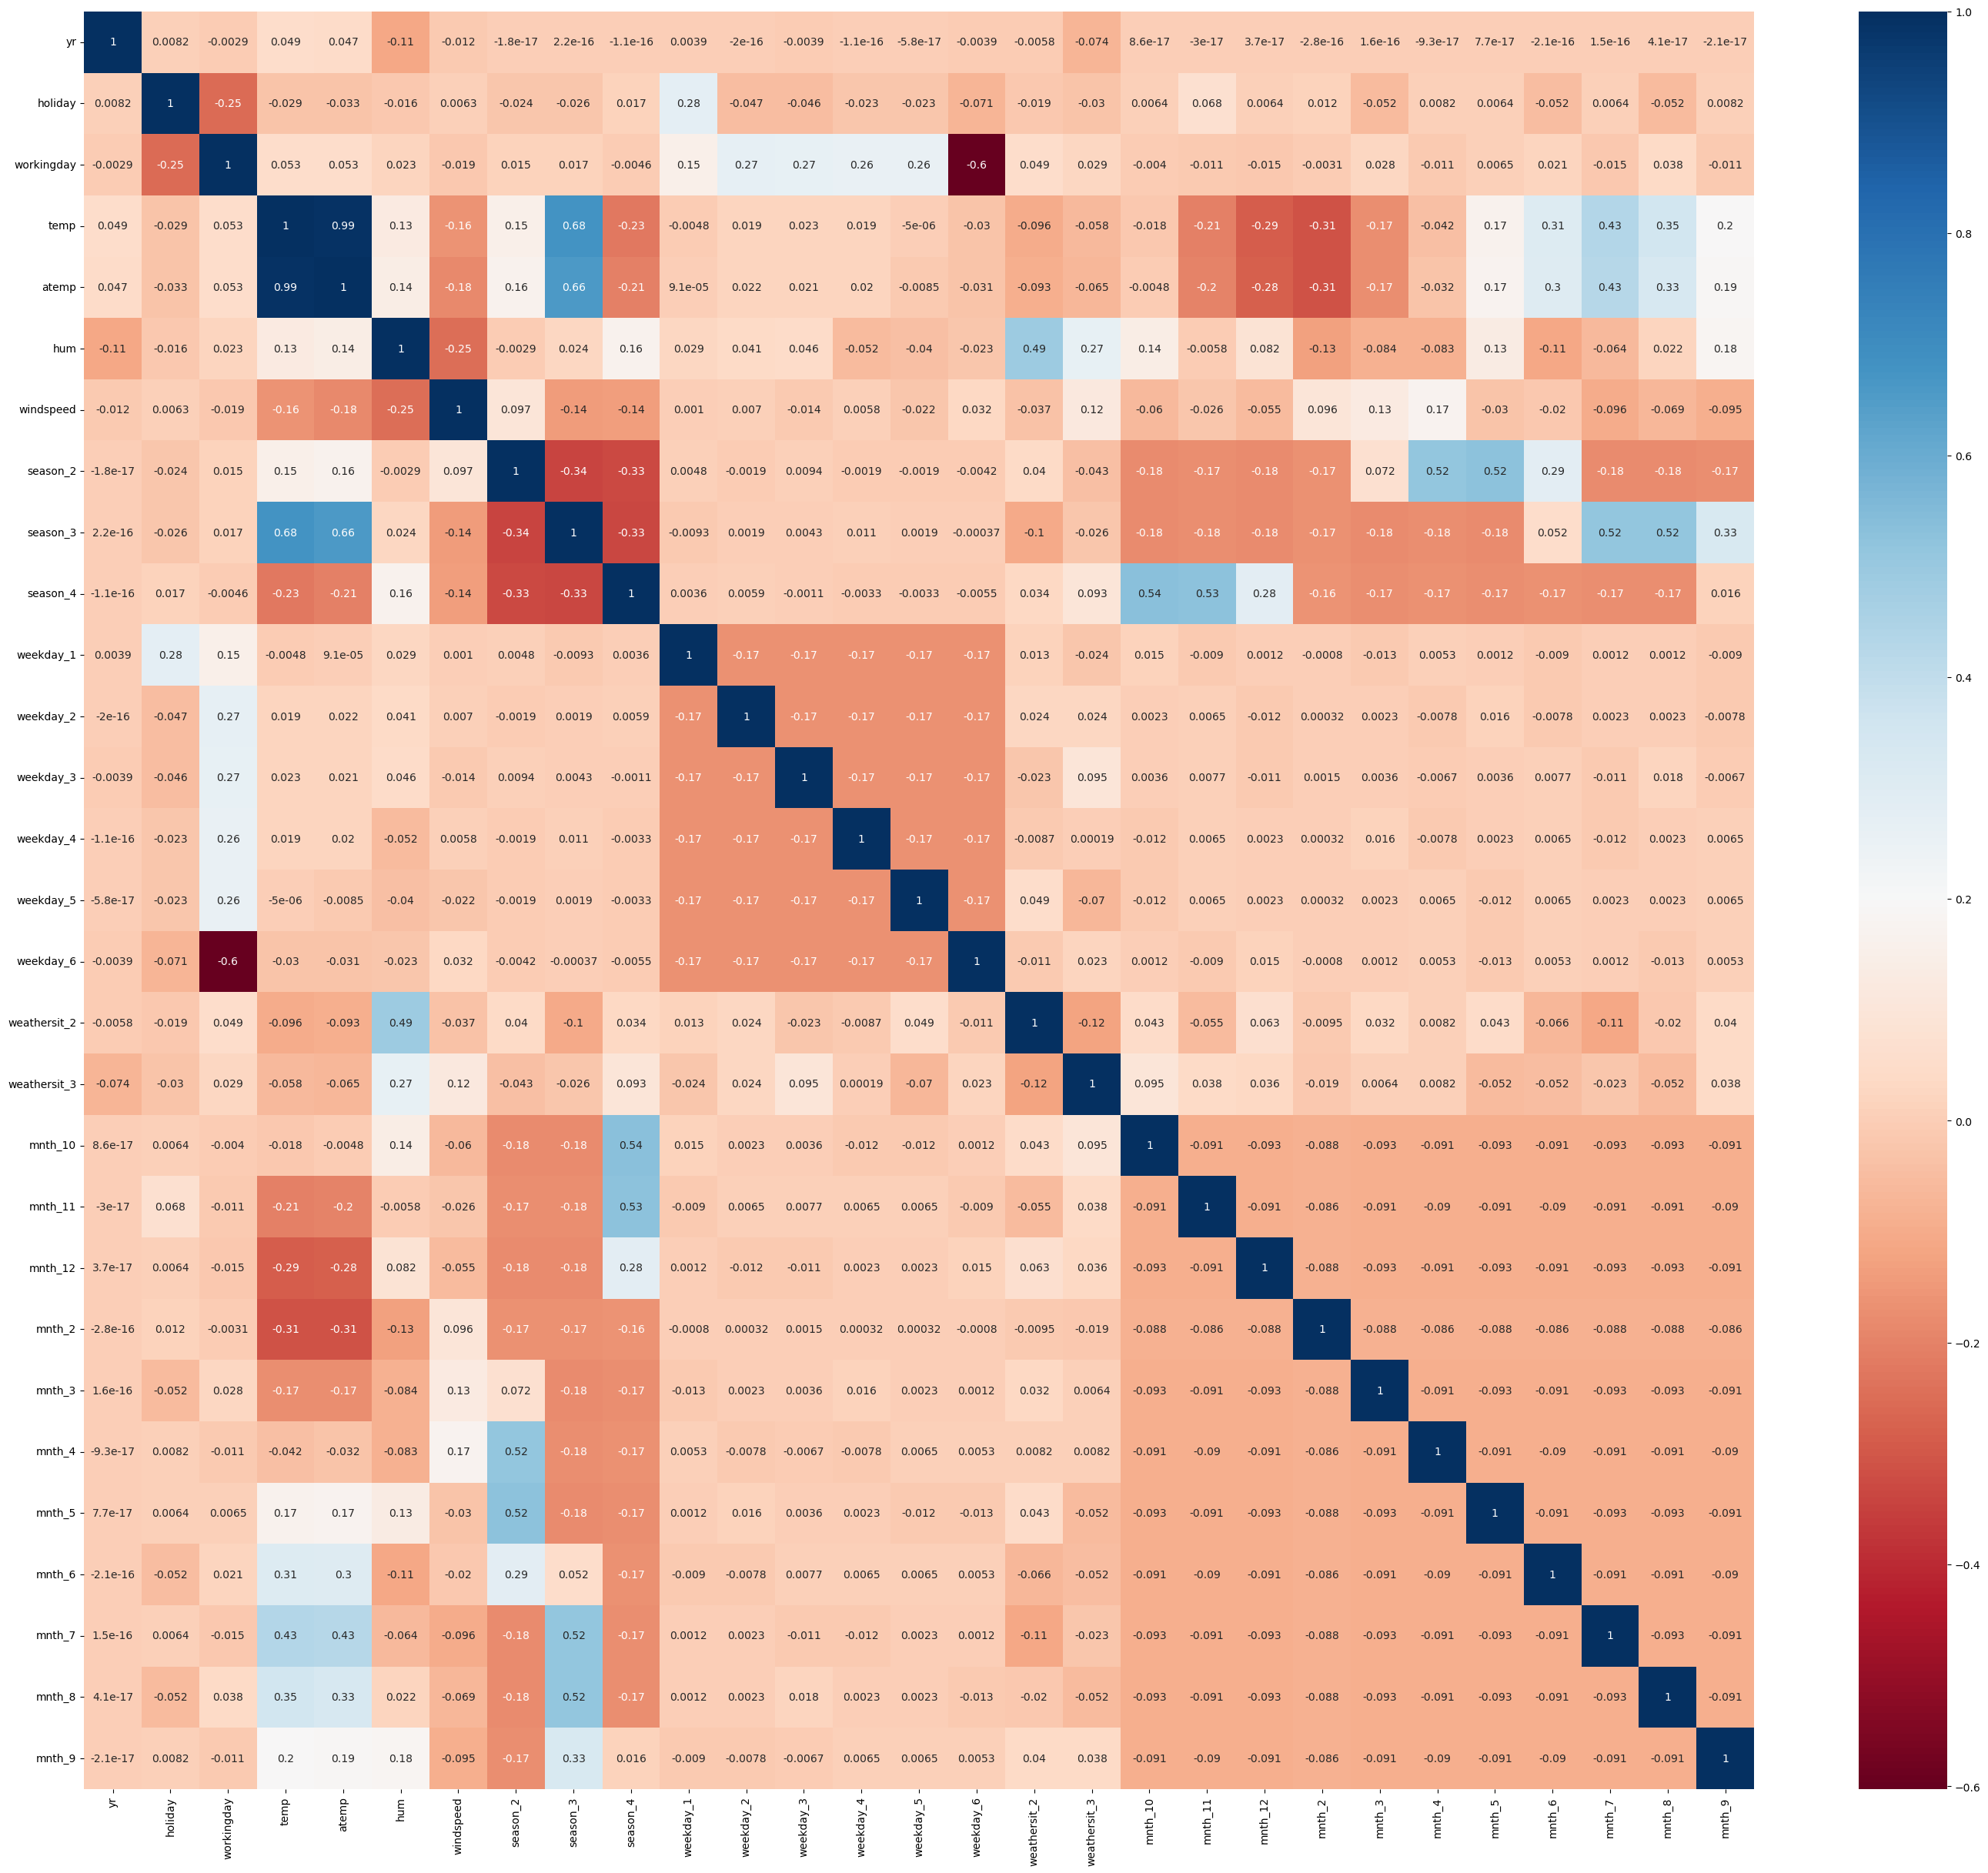

In [45]:
## lets plot the heatmap of df where all the columns are transformed into so called numerical variable

corr = X_train.corr()
plt.figure(figsize = (35,30))
sns.heatmap(bike.corr(), annot=True, cmap="RdBu")
plt.show()

### Conclusion
- The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
- We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

### Manual approach for better visualization

In [46]:
import statsmodels.api as sm

In [47]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,1,0,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,...,0,0,0,0,1,0,0,0,0,0


### Building 1st model with 1 variable

In [48]:
#add a constant
X_train_sm = sm.add_constant(X_train['temp'])

# Create First model
lr = sm.OLS(y_train , X_train_sm)

#fit the model
lr_model = lr.fit()

#params
lr_model.params

const    1499.303186
temp     5567.696766
dtype: float64

In [49]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     359.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):           5.52e-61
Time:                        23:43:01   Log-Likelihood:                -4460.2
No. Observations:                 511   AIC:                             8924.
Df Residuals:                     509   BIC:                             8933.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1499.3032    171.236      8.756      0.000    1162.887    1835.719
temp        5567.6968    293.841     18.948      0.000    4990.406    6144.987
==============================================================================
Omnibus:                        6.526   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                4.653
Skew:                           0.094   Prob(JB):                       0.0977
Kurtosis:                       2.572   Cond. No.                         5.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion on 1st model with 1 variable

- R2 = 0.414 i.e it explains 41% of variance in count is explained by temp
- P-value = 0 so the result is statistically significant

### Building 2nd model with 2 variables

- Since temp and atemp are highly correlated we will skip atemp
- taking 2nd variable as Year, correlation with cnt is 0.57

In [50]:
X_train_sm = X_train[['temp' , 'yr']]
X_train_sm = sm.add_constant(X_train_sm)

# Create First model
lr = sm.OLS(y_train , X_train_sm)

#fit the model
lr_model = lr.fit()

#params
lr_model.params

const     713.210472
temp     5074.085470
yr       2066.311681
dtype: float64

In [51]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     566.8
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.06e-130
Time:                        23:43:01   Log-Likelihood:                -4296.9
No. Observations:                 511   AIC:                             8600.
Df Residuals:                     508   BIC:                             8613.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        713.2105    129.858      5.492      0.000     458.086     968.335
temp        5074.0855    214.918     23.609      0.000    4651.848    5496.323
yr          2066.3117     96.908     21.322      0.000    1875.922    2256.702
==============================================================================
Omnibus:                       31.761   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.138
Skew:                          -0.507   Prob(JB):                     4.29e-10
Kurtosis:                       3.998   Cond. No.                         6.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion on 2nd model with 2 variables

- R2 = 0.682 i.e it explains 68% of variance in count is explained by temp and year
- P-value = 0 so the result is statistically significant
- Coefficients are positive

### Building 3rd model with 3 variables

- taking 3rd variable as season_3, correlation with cnt is 0.35

In [52]:
X_train_sm = X_train[['temp' , 'yr' , 'season_3']]
X_train_sm = sm.add_constant(X_train_sm)

# Create First model
lr = sm.OLS(y_train , X_train_sm)

#fit the model
lr_model = lr.fit()

#params
lr_model.params

const        468.759734
temp        5804.120276
yr          2051.014573
season_3    -534.171179
dtype: float64

In [53]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     390.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.30e-131
Time:                        23:43:01   Log-Likelihood:                -4290.7
No. Observations:                 511   AIC:                             8589.
Df Residuals:                     507   BIC:                             8606.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.7597    145.857      3.214      0.001     182.201     755.318
temp        5804.1203    296.373     19.584      0.000    5221.850    6386.390
yr          2051.0146     95.928     21.381      0.000    1862.549    2239.480
season_3    -534.1712    151.144     -3.534      0.000    -831.118    -237.225
==============================================================================
Omnibus:                       36.813   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.484
Skew:                          -0.536   Prob(JB):                     1.48e-12
Kurtosis:                       4.188   Cond. No.                         9.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion -
 - with adding one more variable R2 is slightly increasing
 - so now we will move ahead with Automated selection using RFE techniques

# RFE - Automated approach
Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [54]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2',
       'weathersit_3', 'mnth_10', 'mnth_11', 'mnth_12', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9'],
      dtype='object')

In [55]:
#lets build model with all the variables

In [56]:

X_train_sm = sm.add_constant(X_train)

# Create First model
lr = sm.OLS(y_train , X_train_sm)

#fit the model
lr_model = lr.fit()

#params
lr_model.params

const           1554.750731
yr              2025.117727
holiday         -358.801449
workingday       383.182782
temp            3356.530738
atemp            522.563969
hum            -1330.317558
windspeed      -1597.453766
season_2         763.497926
season_3         395.058092
season_4        1324.358317
weekday_1        -90.001523
weekday_2        -47.383362
weekday_3         47.989853
weekday_4         14.767393
weekday_5         99.008973
weekday_6        472.232880
weathersit_2    -519.674102
weathersit_3   -2221.569061
mnth_10          640.715688
mnth_11          203.485202
mnth_12          165.406750
mnth_2           266.323811
mnth_3           562.057400
mnth_4           547.525713
mnth_5           771.772614
mnth_6           602.320185
mnth_7           266.069274
mnth_8           744.183288
mnth_9          1305.522296
dtype: float64

In [57]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.76
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          7.47e-181
Time:                        23:43:01   Log-Likelihood:                -4107.0
No. Observations:                 511   AIC:                             8272.
Df Residuals:                     482   BIC:                             8395.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1554.7507    264.837      5.871      0.000    1034.374    2075.127
yr            2025.1177     70.161     28.864      0.000    1887.259    2162.976
holiday       -358.8014    205.929     -1.742      0.082    -763.431      45.828
workingday     383.1828     81.520      4.700      0.000     223.005     543.361
temp          3356.5307   1237.176      2.713      0.007     925.607    5787.455
atemp          522.5640   1203.942      0.434      0.664   -1843.059    2888.187
hum          -1330.3176    335.646     -3.963      0.000   -1989.828    -670.807
windspeed    -1597.4538    229.353     -6.965      0.000   -2048.109   -1146.799
season_2       763.4979    205.484      3.716      0.000     359.742    1167.253
season_3       395.0581    261.060      1.513      0.131    -117.898     908.014
season_4      1324.3583    225.976      5.861      0.000     880.339    1768.377
weekday_1      -90.0015     84.673     -1.063      0.288    -256.375      76.372
weekday_2      -47.3834     96.598     -0.491      0.624    -237.189     142.423
weekday_3       47.9899     91.556      0.524      0.600    -131.909     227.889
weekday_4       14.7674     95.123      0.155      0.877    -172.139     201.674
weekday_5       99.0090     97.674      1.014      0.311     -92.910     290.928
weekday_6      472.2329    126.453      3.734      0.000     223.766     720.699
weathersit_2  -519.6741     90.771     -5.725      0.000    -698.029    -341.319
weathersit_3 -2221.5691    230.205     -9.650      0.000   -2673.899   -1769.239
mnth_10        640.7157    299.464      2.140      0.033      52.300    1229.131
mnth_11        203.4852    285.861      0.712      0.477    -358.202     765.173
mnth_12        165.4067    230.679      0.717      0.474    -287.854     618.668
mnth_2         266.3238    179.580      1.483      0.139     -86.532     619.180
mnth_3         562.0574    194.686      2.887      0.004     179.519     944.595
mnth_4         547.5257    292.357      1.873      0.062     -26.926    1121.978
mnth_5         771.7726    315.057      2.450      0.015     152.718    1390.827
mnth_6         602.3202    338.179      1.781      0.076     -62.167    1266.807
mnth_7         266.0693    381.992      0.697      0.486    -484.505    1016.644
mnth_8         744.1833    364.162      2.044      0.042      28.642    1459.724
mnth_9        1305.5223    325.246      4.014      0.000     666.447    1944.598
==============================================================================
Omnibus:                       85.644   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.466
Skew:                          -0.811   Prob(JB):                     6.07e-53
Kurtosis:                       5.944   Cond. No.                     2.25e+15
===============

In [58]:
#significance (p-values)
#VIF

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
#create a df that will contain the names of columns of all features and corresponding VIF
vif =  pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values , i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\MAA\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
14,weekday_5,inf
2,workingday,inf
10,weekday_1,inf
11,weekday_2,inf
12,weekday_3,inf
13,weekday_4,inf
1,holiday,inf
3,temp,447.04
4,atemp,383.80
5,hum,20.83


In [61]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [62]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [63]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('weekday_1', False, 11),
 ('weekday_2', False, 12),
 ('weekday_3', False, 14),
 ('weekday_4', False, 15),
 ('weekday_5', False, 13),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 9),
 ('mnth_12', False, 10),
 ('mnth_2', False, 7),
 ('mnth_3', False, 2),
 ('mnth_4', False, 5),
 ('mnth_5', False, 3),
 ('mnth_6', False, 4),
 ('mnth_7', False, 8),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1)]

### Function to build a model using statsmodel api - to build models and VIFs


In [64]:
#Function to build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

#### Function to calculate VIFs and print them


In [65]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [66]:
#Print Columns selected by RFE. We will manually eliminate for these columns
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'weekday_6', 'weathersit_2', 'weathersit_3',
       'mnth_10', 'mnth_8', 'mnth_9'],
      dtype='object')

In [67]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'mnth_11', 'mnth_12', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7'],
      dtype='object')

In [68]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'weekday_6', 'weathersit_2', 'weathersit_3',
       'mnth_10', 'mnth_8', 'mnth_9']]

In [69]:
X_train_rfe.shape


(511, 15)

### Model 1

In [70]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'weekday_6', 'weathersit_2', 'weathersit_3',
       'mnth_10', 'mnth_8', 'mnth_9']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.24e-191
Time:                        23:43:02   Log-Likelihood:                -4114.6
No. Observations:                 511   AIC:                             8261.
Df Residuals:                     495   BIC:                             8329.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1721.7517    249.988      6.887   

### Model-2

In [71]:
# Dropping the variable season_3 as it has negative coefficient and is insignificant as it has high VIF
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
        'season_4', 'weekday_6', 'weathersit_2', 'weathersit_3',
       'mnth_10', 'mnth_8', 'mnth_9']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.4
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.11e-192
Time:                        23:43:02   Log-Likelihood:                -4115.5
No. Observations:                 511   AIC:                             8261.
Df Residuals:                     496   BIC:                             8325.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1717.7226    250.166      6.866   

### Model 3

In [72]:
# Dropping the variable hum as it has negative coefficient and has high VIF
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_2',
        'season_4', 'weekday_6', 'weathersit_2', 'weathersit_3',
       'mnth_10', 'mnth_8', 'mnth_9']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          5.30e-189
Time:                        23:43:02   Log-Likelihood:                -4126.4
No. Observations:                 511   AIC:                             8281.
Df Residuals:                     497   BIC:                             8340.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          834.9031    165.911      5.032   

### Model-4

In [73]:
# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr','workingday', 'temp', 'windspeed', 'season_2',
        'season_4', 'weekday_6', 'weathersit_2', 'weathersit_3',
       'mnth_10', 'mnth_8', 'mnth_9']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.9
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.39e-189
Time:                        23:43:02   Log-Likelihood:                -4128.4
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     498   BIC:                             8338.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          757.6494    161.660      4.687   

### Model 5

In [74]:
# Dropping the variable mnth_10,it has corr with temp and it has high VIF
cols = ['yr','workingday', 'temp', 'windspeed', 'season_2',
        'season_4', 'weekday_6', 'weathersit_2', 'weathersit_3', 'mnth_8' ,'mnth_9']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.4
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.64e-189
Time:                        23:43:02   Log-Likelihood:                -4130.8
No. Observations:                 511   AIC:                             8286.
Df Residuals:                     499   BIC:                             8336.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          720.0905    161.358      4.463   

### Model 6

In [75]:
# Dropping the variable mnth_8,it has corr with temp and it has high VIF
cols_final = ['yr','workingday', 'temp', 'windspeed', 'season_2',
        'season_4', 'weekday_6', 'weathersit_2', 'weathersit_3', 'mnth_9']
build_model(cols_final)
get_vif(cols_final)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.7
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.13e-188
Time:                        23:43:02   Log-Likelihood:                -4135.7
No. Observations:                 511   AIC:                             8293.
Df Residuals:                     500   BIC:                             8340.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          668.8308    161.877      4.132   

In [76]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [77]:
#Let us build the finalmodel using sklearn
#Build a model with above columns
lr = build_model_sk(X_train[cols_final],y_train)
print(lr.intercept_,lr.coef_)

668.8307950207263 [ 2030.8264518    492.25940727  4781.26014052 -1347.56653883
   769.96935003  1145.81047394   587.68089616  -699.5311964
 -2501.63703369   844.14188046]


### Insights
This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

## Final Model Interpretation

### Hypothesis Testing


#### Hypothesis testing states that:

- H0:B1=B2=...=Bn=0
- H1: at least one Bi!=0

#### lr6 model coefficient values
- const 668.83
- yr 2030.8265
- workingday 492.2594
- temp 4781.2601
- windspeed -1347.566
- season_2 769.9694
- season_4 1145.8105
- mnth_9 844.1419
- weekday_6 587.6809
- weathersit_2 -699.5312
- weathersit_3 -2501.6370

#### Inference
From the lr6 model summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS

#### F Statistics
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic: 253.7
- Prob (F-statistic): 1.13e-188
- The F-Statistics value of 253.7 (which is greater than 1) and the p-value of '0.0000' states that the overall model is significant

## Residual Analysis


In [78]:
y_train_pred = lr.predict(X_train[cols_final])


In [79]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

C:\Users\MAA\AppData\Local\Temp\ipykernel_12480\3357394689.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(act-pred)


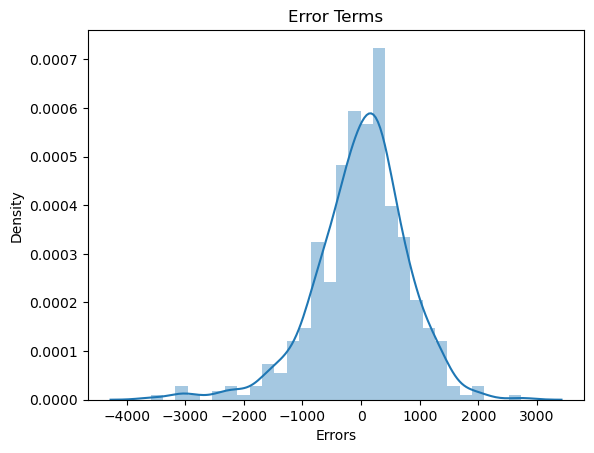

In [80]:
plot_res_dist(y_train, y_train_pred)


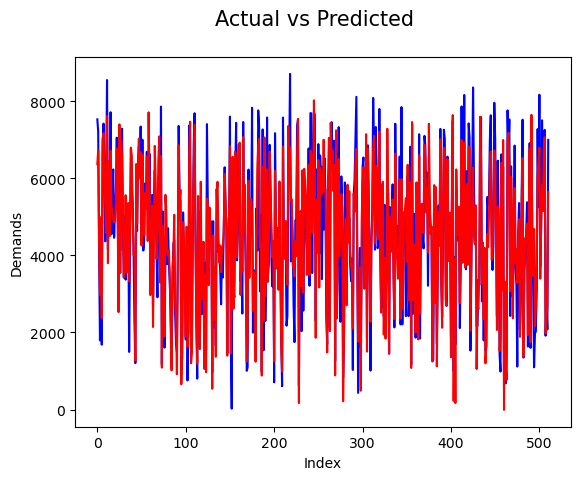

In [81]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

## Model Predictions


In [82]:
from sklearn.metrics import r2_score,mean_squared_error

#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8353552167101637

### Prediction of values on test dataset


In [83]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [84]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    int32  
 8   season_3      219 non-null    int32  
 9   season_4      219 non-null    int32  
 10  weekday_1     219 non-null    int32  
 11  weekday_2     219 non-null    int32  
 12  weekday_3     219 non-null    int32  
 13  weekday_4     219 non-null    int32  
 14  weekday_5     219 non-null    int32  
 15  weekday_6     219 non-null    int32  
 16  weathersit_2  219 non-null    int32  
 17  weathersit_3  219 non-null    int32  
 18  mnth_10       219 non-null    int3

In [85]:
cols_final = ['yr','workingday', 'temp', 'windspeed', 'season_2',
        'season_4', 'weekday_6', 'weathersit_2', 'weathersit_3', 'mnth_9']

#Predicting test data values
y_test_pred = lr.predict(X_test[cols_final])

### R-Squared value for test predictions


In [86]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.7955645438360066

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Perform cross-validation on training data
cross_val_scores = cross_val_score(lm, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R-squared scores:", cross_val_scores)
print("Mean Cross-Validation R-squared score:", cross_val_scores.mean())

Cross-Validation R-squared scores: [0.82076532 0.8318152  0.82191978 0.81217142 0.84627817]
Mean Cross-Validation R-squared score: 0.8265899780822487


In [88]:
cross_val_scores = cross_val_score(lm, X_test, y_test, cv=5, scoring='r2')
print("Cross-Validation R-squared scores:", cross_val_scores)
print("Mean Cross-Validation R-squared score:", cross_val_scores.mean())

Cross-Validation R-squared scores: [0.70357028 0.7765999  0.79754906 0.88281922 0.83879721]
Mean Cross-Validation R-squared score: 0.7998671363264022


Text(0, 0.5, 'y_pred')

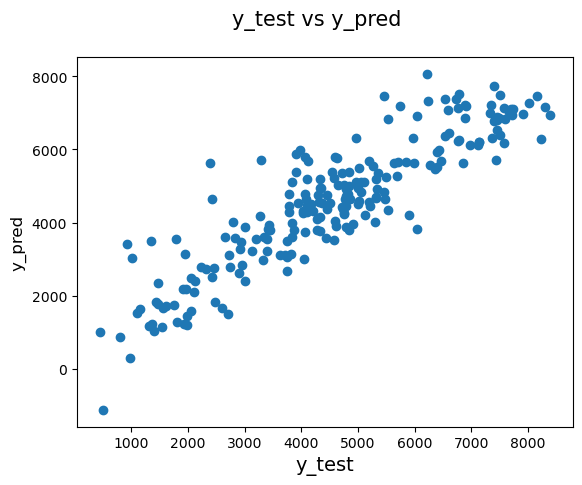

In [89]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 

In [90]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols_final = ['yr','workingday', 'temp', 'windspeed', 'season_2',
        'season_4', 'weekday_6', 'weathersit_2', 'weathersit_3', 'mnth_9']

lm = build_model(cols_final)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.7
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.13e-188
Time:                        23:43:02   Log-Likelihood:                -4135.7
No. Observations:                 511   AIC:                             8293.
Df Residuals:                     500   BIC:                             8340.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          668.8308    161.877      4.132   

## Final Result

- Train R2 :0.835
- Test R2 :0.795
- This seems to be a really good model that can very well 'Generalize' various datasets

## FINAL CONCLUSION
As per our final Model, the top 3 predictor variables that influences the bike booking are:

- Temperature (temp)it increase in temp variable increases the bike hire numbits.
- Weather Situation 3 (weathersit_3 nit increase in Weathersit3 variable decreases the bike hire numits.
- Year - increase in yr variable increases the bike hire units.
So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking

The next best features that can also be considered are

season winter , weather situation while rains and month sept